In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read dataset
data = pd.read_csv("car_evaluation.csv")

In [3]:
#control the dataset shape
data.shape

(1727, 7)

In [4]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
#replace the colum name
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data.columns = column_names

In [6]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [7]:
#summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
#check the frewuency count of catagorical variables
for column in column_names:
    print(data[column].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [9]:
#class is our target variables
data["class"].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [10]:
# to separate the dataset into two main pieces
X = data.drop(["class"], axis = 1)
y = data["class"]

In [11]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [12]:
#Split data into separate training and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, shuffle=True, random_state= 42)

In [13]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1381, 6), (346, 6))

In [16]:
# Encode the dataset
from category_encoders import OrdinalEncoder

In [17]:
encoder = OrdinalEncoder(cols=["buying", "maint", "doors", "persons", "lug_boot", "safety"])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

C:\Users\RAKORT\anaconda3\envs\newenv\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [18]:
X_test

,buying,maint,doors,persons,lug_boot,safety
1695,2,3,4,3,1,1
908,1,4,1,3,2,3
524,3,4,2,1,1,3
1080,1,1,3,2,2,1
592,3,2,1,3,3,2
...,...,...,...,...,...,...
1658,2,3,1,1,1,3
265,4,1,1,3,1,2
387,4,3,4,1,2,1
1114,1,1,1,2,3,2


In [19]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1119,1,1,1,1,1,1
999,1,2,1,2,2,1
1503,2,2,2,3,2,1
1201,1,3,3,1,1,2
1354,2,4,4,2,1,2
...,...,...,...,...,...,...
83,4,4,2,2,1,3
212,4,2,2,3,3,3
1303,2,4,3,2,3,2
311,4,1,2,1,3,3


In [63]:
# Crate and train model 
from sklearn.tree import DecisionTreeClassifier
# first we train with "gini index" criterion
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0).fit(X_train, y_train)

In [64]:
predict = model.predict(X_test)

In [65]:
# Check the Model accuracy metrics
from sklearn.metrics import accuracy_score

print("Model accuracy score with criterion Gini Index: {0:0.4F}".format(accuracy_score(y_test, predict)))

Model accuracy score with criterion Gini Index: 0.8092


In [66]:
# Compare the train set and test set accuracy

train_predict = model.predict(X_train)
print("Train set accuracy:{0:0.4f}".format(accuracy_score(y_train, train_predict)))

Train set accuracy:0.7784


In [67]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.7784
Test set score: 0.8092


There is no over fitting 

[Text(418.5, 380.52, 'X[5] <= 2.5\ngini = 0.457\nsamples = 1381\nvalue = [307, 55, 967, 52]'),
 Text(334.8, 271.8, 'X[3] <= 1.5\ngini = 0.58\nsamples = 919\nvalue = [307, 55, 505, 52]'),
 Text(167.4, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.617\nsamples = 301\nvalue = [157, 27, 94, 23]'),
 Text(83.7, 54.360000000000014, 'gini = 0.622\nsamples = 149\nvalue = [83, 27, 16, 23]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.5\nsamples = 152\nvalue = [74, 0, 78, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[3] <= 2.5\ngini = 0.495\nsamples = 618\nvalue = [150, 28, 411, 29]'),
 Text(418.5, 54.360000000000014, 'gini = 0.0\nsamples = 302\nvalue = [0, 0, 302, 0]'),
 Text(585.9, 54.360000000000014, 'gini = 0.639\nsamples = 316\nvalue = [150, 28, 109, 29]'),
 Text(502.20000000000005, 271.8, 'gini = 0.0\nsamples = 462\nvalue = [0, 0, 462, 0]')]

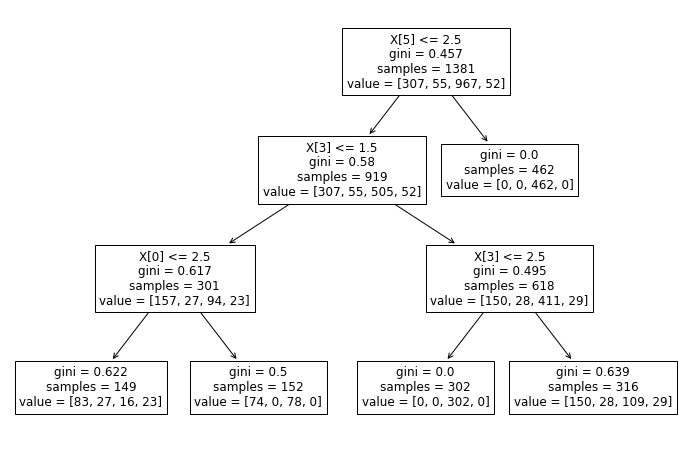

In [80]:
# Visualize the Decision Tree
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(model.fit(X_train, y_train))

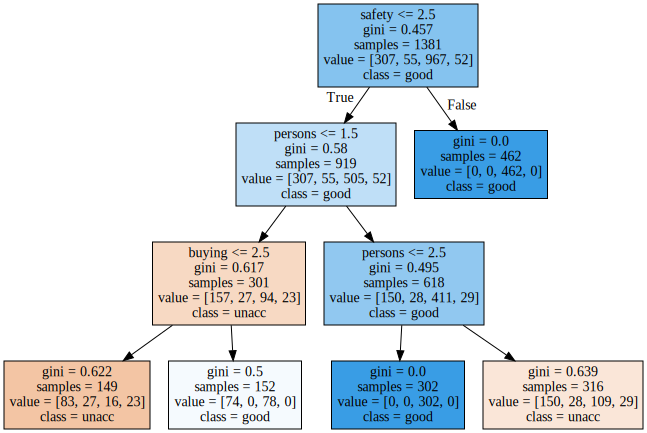

In [82]:
import graphviz
tree_data = tree.export_graphviz(model, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=["unacc","acc","good","vgood"],
                              filled=True,)

graph = graphviz.Source(tree_data, format="png") 

graph 

In [83]:
graph.render("decision_tree_graphivz_gini")

'decision_tree_graphivz_gini.png'

In [84]:
# Decision Tree Classifier with criterion entropy

model_entropy  = DecisionTreeClassifier(criterion="entropy",max_depth=3, random_state=0).fit(X_train,y_train)

In [85]:
predict_en = model_entropy.predict(X_test)

In [86]:
#check accuracy score
print("Model accuracy score wtih criterion entropy: {0:0.4f}".format(accuracy_score(y_test,predict_en)))

Model accuracy score wtih criterion entropy: 0.7659


In [87]:
#Compare the train-set and test-set accuracy

predict_train_en = model_entropy.predict(X_train)

In [88]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, predict_train_en)))

Training-set accuracy score: 0.7487


In [89]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_entropy.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_entropy.score(X_test, y_test)))

Training set score: 0.7487
Test set score: 0.7659


[Text(418.5, 380.52, 'X[5] <= 2.5\nentropy = 1.206\nsamples = 1381\nvalue = [307, 55, 967, 52]'),
 Text(334.8, 271.8, 'X[0] <= 2.5\nentropy = 1.481\nsamples = 919\nvalue = [307, 55, 505, 52]'),
 Text(167.4, 163.07999999999998, 'X[3] <= 1.5\nentropy = 1.793\nsamples = 446\nvalue = [159, 55, 180, 52]'),
 Text(83.7, 54.360000000000014, 'entropy = 1.679\nsamples = 149\nvalue = [83, 27, 16, 23]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 1.625\nsamples = 297\nvalue = [76, 28, 164, 29]'),
 Text(502.20000000000005, 163.07999999999998, 'X[1] <= 3.5\nentropy = 0.896\nsamples = 473\nvalue = [148, 0, 325, 0]'),
 Text(418.5, 54.360000000000014, 'entropy = 0.976\nsamples = 362\nvalue = [148, 0, 214, 0]'),
 Text(585.9, 54.360000000000014, 'entropy = 0.0\nsamples = 111\nvalue = [0, 0, 111, 0]'),
 Text(502.20000000000005, 271.8, 'entropy = 0.0\nsamples = 462\nvalue = [0, 0, 462, 0]')]

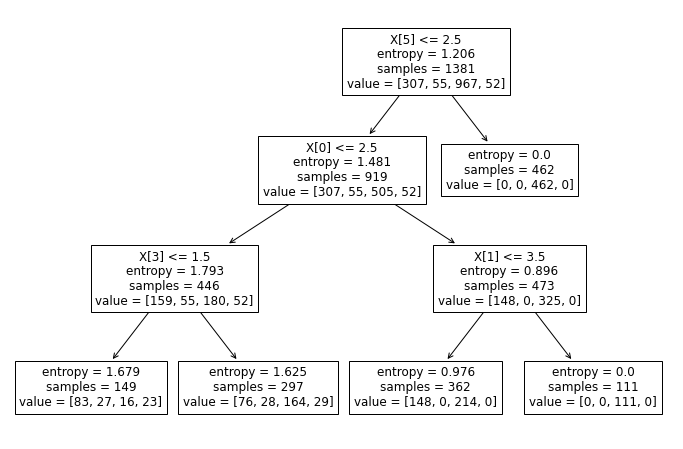

In [90]:
# Visualize the Decision Tree
plt.figure(figsize=(12,8))

tree.plot_tree(model_entropy.fit(X_train,y_train))

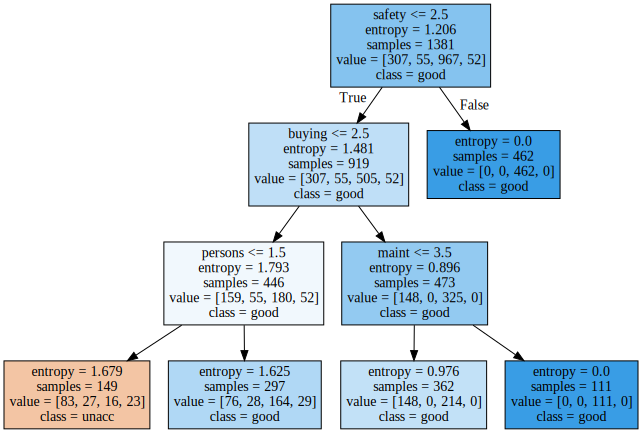

In [91]:
import graphviz
tree_data = tree.export_graphviz(model_entropy, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=["unacc","acc","good","vgood"],
                              filled=True,)

graph = graphviz.Source(tree_data, format="png") 

graph 

In [92]:
#Save the tree
graph.render("decision_tree_graphivz_entropy")

'decision_tree_graphivz_entropy.png'

In [94]:
# Analysis the Confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predict_en)
print("Confusion Matrix \n",cm)

Confusion Matrix 
 [[ 25   0  52   0]
 [  9   0   5   0]
 [  2   0 240   0]
 [  7   0   6   0]]


In [95]:
# Analysis the classification report

from sklearn.metrics import classification_report

print(classification_report(y_test,predict_en))

              precision    recall  f1-score   support

         acc       0.58      0.32      0.42        77
        good       0.00      0.00      0.00        14
       unacc       0.79      0.99      0.88       242
       vgood       0.00      0.00      0.00        13

    accuracy                           0.77       346
   macro avg       0.34      0.33      0.32       346
weighted avg       0.68      0.77      0.71       346



C:\Users\RAKORT\anaconda3\envs\newenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RAKORT\anaconda3\envs\newenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RAKORT\anaconda3\envs\newenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
